# Gaussian equation
$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{-(x-\mu)^2}{2\sigma^2}}
$$

- The symbol $\mu$ `represents a population mean`
- The symbol $\sigma$ `is the standard deviation of the distribution, which represents the spread`.

The mean and standard deviation are constants when dealing witha population.
So for a specific population, the only value that varies is x.

In [2]:
# Say on average, the minimum winter temperature in San Francisco is 50 degrees Fahrenheit.
# Let's say the standard deviation is 10 degrrees

# Given that the mean is 50 and the standard deviation is 10
# calculate the probability density function f(x) of the Gaussian distribution
# Use the following temperature data: x = [29, 45, 48, 50, 62, 78]

import math
def density(x, mu, sigma):
    return (1/math.sqrt(2*math.pi*sigma**2)) * math.e ** ((-1*(x-mu)**2)/(2*sigma**2))

x = [29, 45, 48, 50, 62, 70]
y = [density(xi, 50, 10) for xi in x]

for yi in y:
    print(f"{yi:.4f}", end = ", ")


0.0044, 0.0352, 0.0391, 0.0399, 0.0194, 0.0054, 

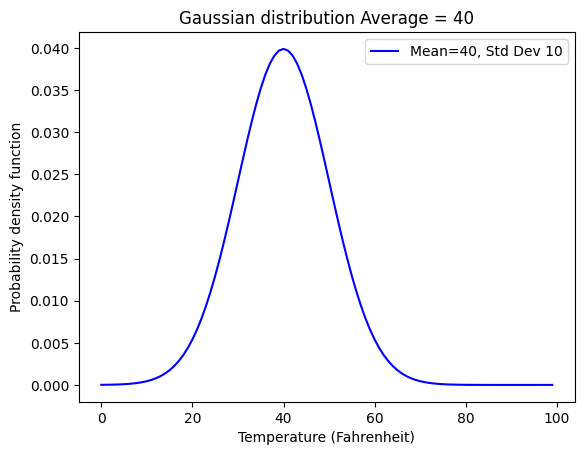

In [4]:
# What exactly does the mean value represent in a Gaussian distribution
# The mean value is the center of the bell curve.

# Take a look at the visualization below. 
# Staying with the San Francisco temperature example,
# it shows three distributions with three different means
# Everything else stays the same including the standard deviation

from matplotlib import pyplot as plt
%matplotlib inline

def visualize_gaussian(x, mu, sigma):
    y = [density(xi, mu, sigma) for xi in x]
    plt.plot(x, y, color = "blue")
    plt.xlabel("Temperature (Fahrenheit)")
    plt.ylabel("Probability density function")
    plt.title(f"Gaussian distribution Average = {mu}")    
    plt.legend([f"Mean={mu}, Std Dev {sigma}"])
    plt.show()

x = [xi for xi in range(0, 100, 1)]
visualize_gaussian(x, 40, 10)


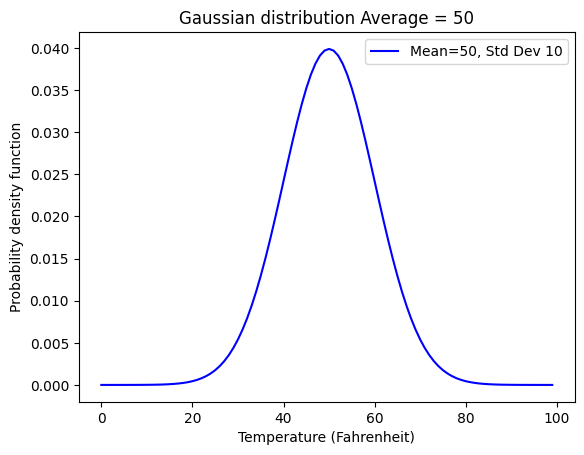

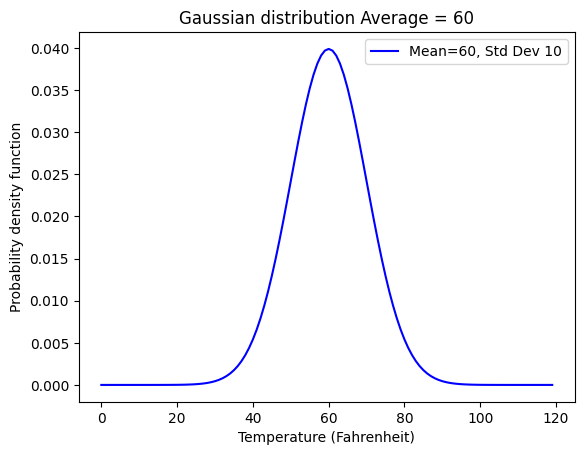

In [6]:
x = [xi for xi in range(0, 100, 1)]
visualize_gaussian(x, 50, 10)

x = [xi for xi in range(0, 120, 1)]
visualize_gaussian(x, 60, 10)

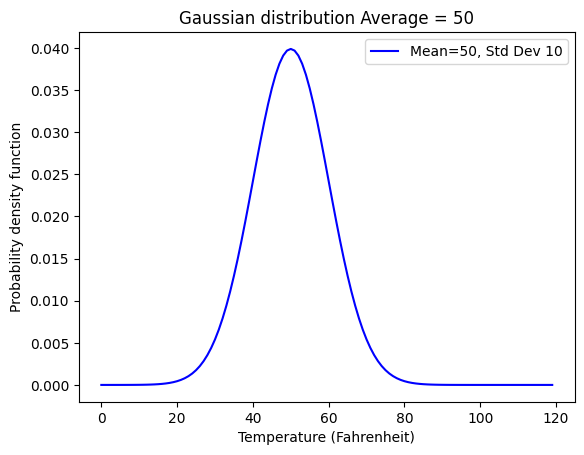

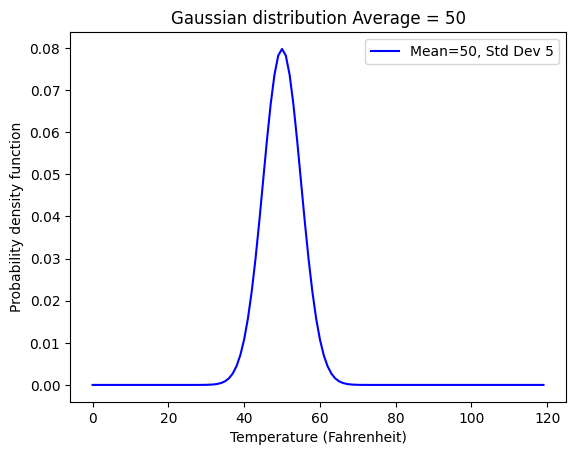

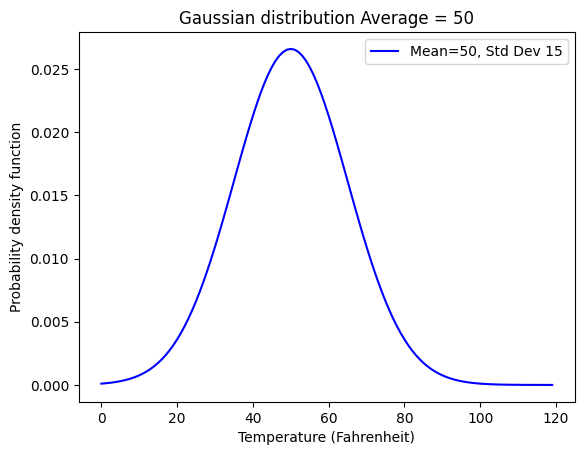

In [7]:
visualize_gaussian(x, 50, 10)
visualize_gaussian(x, 50, 5)
visualize_gaussian(x, 50, 15)